In [1]:
import numpy as np 
import pandas as pd 
import netCDF4
import pickle 
import os
import pandas as pd
import h5py 
import numpy as np

def Reshape( X ):
    x =[ ]
    for i in range(X.shape[1]):
        x.append(X[: , i  , :])
    return np.array(x)

def rescale( data  ,Ref ) :
    means = np.mean(Ref , axis = 0 )
    std = np.std( Ref , axis =0)
    return (data -means ) / std

def Dict_to_hdf(Dict , of ):
    HDF = h5py.File(of, 'w')
    for k in Dict :    
        test = HDF.create_dataset( k , data = np.array(Dict[k] ))
    HDF.close()   


def nc_to_pd(nc):
    try:
        Keys = list(nc.keys())
    except:
        Keys = list(nc.variables)
    Panda ={ }
    for k in Keys:
        Panda[k]= np.array(nc[k] )    
    return pd.DataFrame(Panda)

def DF_bites_to_str(DF):
    for k in DF :
        if type(DF[k][0])  == np.bytes_ :
            DF[k]  = np.array( DF[k]).astype(str)
    return DF




# 1. Readinf rhe datasets

In [2]:

Folder = "D:/Projects/precipitation_AUS/dataset/0025/"
files = os.listdir(Folder)
hdfs = []

for file in files :
    hdf = h5py.File(Folder + file , 'r+')
    hdfs.append( hdf)
    print(hdf.keys())
    



<KeysViewHDF5 ['CAL_P', 'CAL_P(-1)', 'CAL_P(-2)', 'CAL_P(-3)', 'CAL_P(-4)', 'CAL_P(-5)', 'CAL_P_ave', 'DAY', 'DEWP', 'DEWP_ATTRIBUTES', 'Date', 'ELEVATION', 'ERA5_cape', 'ERA5_cape(-1)', 'ERA5_cape(-2)', 'ERA5_cape(-3)', 'ERA5_cape(-4)', 'ERA5_cape(-5)', 'ERA5_msl', 'ERA5_msl(-1)', 'ERA5_msl(-2)', 'ERA5_msl(-3)', 'ERA5_msl(-4)', 'ERA5_msl(-5)', 'ERA5_t2m', 'ERA5_t2m(-1)', 'ERA5_t2m(-2)', 'ERA5_t2m(-3)', 'ERA5_t2m(-4)', 'ERA5_t2m(-5)', 'ERA5_tcw', 'ERA5_tcw(-1)', 'ERA5_tcw(-2)', 'ERA5_tcw(-3)', 'ERA5_tcw(-4)', 'ERA5_tcw(-5)', 'ERA5_tp', 'ERA5_tp(-1)', 'ERA5_tp(-2)', 'ERA5_tp(-3)', 'ERA5_tp(-4)', 'ERA5_tp(-5)', 'FRSHTT', 'GUST', 'HQ_P', 'HQ_P(-1)', 'HQ_P(-2)', 'HQ_P(-3)', 'HQ_P(-4)', 'HQ_P(-5)', 'LATITUDE', 'LONGITUDE', 'LSTM_RA_0', 'LSTM_RA_0(-1)', 'LSTM_RA_0(-2)', 'LSTM_RA_0(-3)', 'LSTM_RA_0(-4)', 'LSTM_RA_1', 'LSTM_RA_2', 'LSTM_RA_3', 'LSTM_RA_3(-1)', 'LSTM_RA_3(-2)', 'LSTM_RA_3(-3)', 'LSTM_RA_3(-4)', 'LSTM_RA_4', 'LSTM_RA_4(-4)', 'MAX', 'MAX_ATTRIBUTES', 'MIN', 'MIN_ATTRIBUTES', 'MON

In [53]:
needed_keys = [ 'NAME' , 'STATION' , 'LATITUDE' , 'LONGITUDE' ,  
               'YEAR'  , 'MONTH'   ,  'DAY'  , 'PRCP'  , 'state_code'  , 
               'state_name'   ,
                   'HQ_P(-1)-(13, 13)', 'HQ_P(-2)-(13, 13)', 
               'HQ_P(-3)-(13, 13)', 'HQ_P(-4)-(13, 13)'] 

DF = {}
for k in needed_keys :
    for hdf in hdfs :
        if (k not in list(DF.keys())) and (k in list(hdf.keys())):
            DF[k] = np.array(hdf[k])
            


In [4]:
def Decode( List, Format ):
    a = [ ]
    for l in List:
        a.append(   l.decode(Format))
    return np.array(a)
    

In [5]:
DF['NAME'] = Decode( List =list( DF['NAME']), Format = 'ascii')
DF['state_name'] = Decode( List =list( DF['state_name']), Format = 'ascii')

In [6]:
def Sum(L1 , L2):
    L = []
    for l in range(len(L1)) :
        L.append(L1[l] + L2[l]) 
    return L

# Input Data

In [6]:
kk = [  'CAL_P'  ,    'PDIR'   ,   'ERA5_tp'  , 'ERA5_cape' , 'ERA5_t2m'  ,  'ERA5_tcw'] 

kk1= [  'HQ_P(-1)-(7, 7)'  ,    'PDIR'   ,   'ERA5_tp'  , 'ERA5_cape' , 'ERA5_t2m'  ,  'ERA5_tcw'] #[  're_CAL_P'  ,    're_PDIR'   ,   're_ERA5_tp'  , 're_ERA5_cape' , 're_ERA5_t2m'  ,  're_ERA5_tcw'] 

kk =kk1 
Ld_1 =   6*[ '(3, 3)']#['(7, 7)' , '(19, 19)'  ]     +  4*[ '(3, 3)']
Ld_2 =  6*[ '(5, 5)'] #['(13, 13)' , '(31, 31)']     +  4*[ '(5, 5)']
Ld_3 =  6*[ '(7, 7)'] #['(17, 17)' , '(43, 43)'  ]     +  4*[ '(7, 7)']


ord_Keys = [  kk1    ,
            
        Sum([k_ +'_ave_box'  for k_ in kk1]  ,  Ld_1 ) ,
        Sum([k_ +'_std_box'  for k_ in kk1]  ,  Ld_1 ) ,
        Sum([k_ +'_Ci_box'  for k_ in kk1]  ,  Ld_1 ) ,
        Sum([k_ +'_Cj_box'  for k_ in kk1]  ,  Ld_1 ) ,

         Sum([k_ +'_ave_box'  for k_ in kk1]  ,  Ld_2 ) ,
        Sum([k_ +'_std_box'  for k_ in kk1]  ,  Ld_2 ) ,
        Sum([k_ +'_Ci_box'  for k_ in kk1]  ,  Ld_2 ) ,
        Sum([k_ +'_Cj_box'  for k_ in kk1]  ,  Ld_2 ) ,
        
         Sum([k_ +'_ave_box'  for k_ in kk1]  ,  Ld_3 ) ,
        Sum([k_ +'_std_box'  for k_ in kk1]  ,  Ld_3 ) ,
        Sum([k_ +'_Ci_box'  for k_ in kk1]  ,  Ld_3 ) ,
        Sum([k_ +'_Cj_box'  for k_ in kk1]  ,  Ld_3 )
]


'''

[k_ +'_ave_box(5, 5)'  for k_ in kk] ,
[k_ +'_std_box(5, 5)'   for k_ in kk]  , 
[k_ +'_Ci_box(5, 5)'   for k_ in kk]  , 
[k_ +'_Cj_box(5, 5)'   for k_ in kk] ,

[k_ +'_ave_box(7, 7)'  for k_ in kk] ,
[k_ +'_std_box(7, 7)'   for k_ in kk]  , 
[k_ +'_Ci_box(7, 7)'   for k_ in kk]  , 
[k_ +'_Cj_box(7, 7)'   for k_ in kk] ,

[k_ +'_ave_box(3, 3)'  for k_ in kk] ,
[k_ +'_std_box(3, 3)'   for k_ in kk]  , 
[k_ +'_Ci_box(3, 3)'   for k_ in kk]  , 
[k_ +'_Cj_box(3, 3)'   for k_ in kk] ]

'''

'''
[k_ +'(-1)_ave_box(5, 5)'  for k_ in kk] ,
[k_ +'(-1)_std_box(5, 5)'   for k_ in kk]  , 
[k_ +'(-1)_Ci_box(5, 5)'   for k_ in kk]  , 
[k_ +'(-1)_Cj_box(5, 5)'   for k_ in kk] ,

[k_ +'(-1)_ave_box(7, 7)'  for k_ in kk] ,
[k_ +'(-1)_std_box(7, 7)'   for k_ in kk]  , 
[k_ +'(-1)_Ci_box(7, 7)'   for k_ in kk]  , 
[k_ +'(-1)_Cj_box(7, 7)'   for k_ in kk] ]



'''
''' 
[ 'CAL_P_ave_box(3, 3)'  ,    'PDIR_ave_box(3, 3)'   ,   'ERA5_tp_ave_box(3, 3)'] ,
[ 'CAL_P_std_box(3, 3)'  ,    'PDIR_std_box(3, 3)'   ,   'ERA5_tp_std_box(3, 3)']  
'''

    
''' 
[  'CAL_P(-1)'  ,    'PDIR(-1)'   ,   'ERA5_tp(-1)'     ,   'ERA5_cape(-1)'    , 'ERA5_t2m(-1)' ,  'ERA5_tcw(-1)'  ]  ,
[  'CAL_P(-2)'  ,    'PDIR(-2)'   ,   'ERA5_tp(-2)'     ,   'ERA5_cape(-2)'    , 'ERA5_t2m(-2)' ,  'ERA5_tcw(-2)'  ]  ,
[  'CAL_P(-3)'  ,    'PDIR(-3)'   ,   'ERA5_tp(-3)'     ,   'ERA5_cape(-3)'    , 'ERA5_t2m(-3)' ,  'ERA5_tcw(-3)'  ] , 
[  'CAL_P(-4)'  ,    'PDIR(-4)'   ,   'ERA5_tp(-4)'     ,   'ERA5_cape(-4)'    , 'ERA5_t2m(-4)' ,  'ERA5_tcw(-4)'  ] 
'''



ord_keys = np.array(ord_Keys) 

obs_key = 'PRCP' # Observations

Rescale = True


for Keys in ord_Keys:
    for k in Keys:
        for hdf in hdfs :
            if k in list(hdf.keys()):
                DF[k] = np.array(hdf[k])
            



'''
['dim_0', 'CAL_P', 'CAL_P(-1)', 'CAL_P(-2)', 'CAL_P(-3)', 'CAL_P(-4)',
       'CAL_P(-5)', 'DAY', 'DEWP', 'DEWP_ATTRIBUTES', 'Date', 'ELEVATION',
       'ERA5_cape', 'ERA5_cape(-1)', 'ERA5_cape(-2)', 'ERA5_cape(-3)',
       'ERA5_cape(-4)', 'ERA5_cape(-5)', 'ERA5_msl', 'ERA5_msl(-1)',
       'ERA5_msl(-2)', 'ERA5_msl(-3)', 'ERA5_msl(-4)', 'ERA5_msl(-5)',
       'ERA5_t2m', 'ERA5_t2m(-1)', 'ERA5_t2m(-2)', 'ERA5_t2m(-3)',
       'ERA5_t2m(-4)', 'ERA5_t2m(-5)', 'ERA5_tcw', 'ERA5_tcw(-1)',
       'ERA5_tcw(-2)', 'ERA5_tcw(-3)', 'ERA5_tcw(-4)', 'ERA5_tcw(-5)',
       'ERA5_tp', 'ERA5_tp(-1)', 'ERA5_tp(-2)', 'ERA5_tp(-3)', 'ERA5_tp(-4)',
       'ERA5_tp(-5)', 'FRSHTT', 'GUST', 'HQ_P', 'HQ_P(-1)', 'HQ_P(-2)',
       'HQ_P(-3)', 'HQ_P(-4)', 'HQ_P(-5)', 'LATITUDE', 'LONGITUDE', 'MAX',
       'MAX_ATTRIBUTES', 'MIN', 'MIN_ATTRIBUTES', 'MONTH', 'MXSPD', 'NAME',
       'PDIR', 'PDIR(-1)', 'PDIR(-2)', 'PDIR(-3)', 'PDIR(-4)', 'PDIR(-5)',
       'PDIR(0)', 'PRCP', 'PRCP_ATTRIBUTES', 'SLP', 'SLP_ATTRIBUTES', 'SNDP',
       'STATION', 'STP', 'STP_ATTRIBUTES', 'TEMP', 'TEMP_ATTRIBUTES',
       'Unnamed: 0.1', 'VISIB', 'VISIB_ATTRIBUTES', 'WDSP', 'WDSP_ATTRIBUTES',
       'YEAR']
       
'''




In [8]:
DF = DF[DF['state_code' ] == 5 ]

In [9]:
DF

In [11]:
for hdf in hdfs: hdf.close()

In [12]:

def Split(DF):
    df_train = DF[DF['YEAR']  <= 2020  ]
    df_test = DF[DF['YEAR']  > 2020]

    df = {}

    df['train']  , df['test']  =  df_train , df_test


    X = {}

    X_train =[]
    X_test =[]

    X_DF = []

    for K in ord_Keys : 

        X['train'] = df['train'][ K  ].values
        X['test'] = df['test'][ K  ].values

        #X_train.append(rescale(  X['train'] , X['train']  )) 
        #X_test.append( rescale(  X['test'] , X['train']  ) )
        X_train.append(X['train']) 
        X_test.append(  X['test'])
        X_DF.append(rescale(   DF[ K  ].values , X['train']  ))

    obs_train  = np.array(df['train'][obs_key])
    obs_test = np.array(df['test'][obs_key])

    X_train = np.array(X_train)
    X_test = np.array(X_test)
    X_DF  = np.array(X_DF)

    return  X_train , X_test , X_DF  , obs_train , obs_test





In [13]:
X_train , X_test , X_DF  , obs_train , obs_test = Split(DF)
obs_test = np.transpose([obs_test]) 
obs_train = np.transpose([obs_train]) 
x_train =  Reshape(X_train)
x_test  = Reshape(X_test)
x_train.shape

(183874, 13, 6)

In [14]:
x_train.shape

(183874, 13, 6)

In [15]:
obs_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

# CNN 1D

In [16]:

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Conv2D , MaxPooling1D
from keras import layers
from keras.layers import Dense, Flatten

In [17]:

Params = {  
    'layers': [32]*6,
    'activation_function'  : ['relu']*6 ,
    'kernels' : [ 6, 3 , 3 ]  + 3 * [ 2 ],
    'n_epoch': 20,
    'size_batch' : 1000,
    'Optimizer' : 'adam'
 }

print( Params['kernels'])
x_train =  Reshape(X_train)
x_test  = Reshape(X_test)

i = 0

model = Sequential() 

model.add(layers.Conv1D(Params['layers'][0], kernel_size= Params['kernels'][0] , activation=Params['activation_function'][0] , input_shape=  (  x_train.shape[1], x_train.shape[2] )))

for i in range(1,len(Params['layers'])):
    model.add(layers.Conv1D(Params['layers'][i], kernel_size= Params['kernels'][i] , activation=Params['activation_function'][i] ))

model.add(Flatten())

model.add(Dense(1))
model.compile(loss="mse", optimizer= Params['Optimizer'])
model.summary()         
model.fit( x_train, obs_train, batch_size=Params['size_batch'],epochs=Params['n_epoch'], verbose=1)




[6, 3, 3, 2, 2, 2]


c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 32)          │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 6, 32)          │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 4, 32)          │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 3, 32)          │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 2, 32)          │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 1, 32)          │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,665 (53.38 KB)

 Trainable params: 13,665 (53.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 68.5778
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 34.4026
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 31.0408
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 31.7760
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28.9844
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 27.8847
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 30.3964
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28.9217
Epoch 9/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28.6438
Epoch 10/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28.8599
Epoch 11/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 27.7768
Epoch 12/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28.2929
Epoch 13/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28.7478
Epoch 14/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 29.0064
Epoch 15/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s

In [18]:
y = model.predict(x_test)


2864/2864 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
y = DF[DF['YEAR']>2020]['ERA5_tp'].values
y = model.predict(x_test).T[0]

import evaluation_tools as ev

ev.evaluation_criteria( obs_test.T[0] , y   , th=0.1,
    threshold_heavy=25,
    threshold_ex=60,
    interval=[ i  for i in [ 0 , 5 , 10 , 25 , 60  , 100]] )

In [52]:
DF

,NAME,STATION,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,PRCP,state_code,state_name,...,"ERA5_cape_Ci_box(7, 7)","ERA5_t2m_Ci_box(7, 7)","ERA5_tcw_Ci_box(7, 7)","CAL_P_Cj_box(7, 7)","PDIR_Cj_box(7, 7)","ERA5_tp_Cj_box(7, 7)","ERA5_cape_Cj_box(7, 7)","ERA5_t2m_Cj_box(7, 7)","ERA5_tcw_Cj_box(7, 7)",CNN7C_WA
4473,ADELE ISLAND,94210099999,-15.516667,123.150000,2014,1,1,0.0,5,b'Western Australia',...,0.128144,0.000711,0.012143,1.000000,0.000000,-1.845747,0.222754,0.001000,-0.010855,4.160448
4474,ADELE ISLAND,94210099999,-15.516667,123.150000,2014,1,2,0.0,5,b'Western Australia',...,0.200073,0.001209,0.065578,1.947804,0.666667,1.396486,0.228492,0.001586,0.054885,1.320142
4475,ADELE ISLAND,94210099999,-15.516667,123.150000,2014,1,3,0.0,5,b'Western Australia',...,0.123733,0.001127,0.045070,-1.661212,-0.178571,1.318761,0.147785,0.000905,0.020605,2.808842
4476,ADELE ISLAND,94210099999,-15.516667,123.150000,2014,1,4,0.0,5,b'Western Australia',...,0.126926,0.001199,-0.008788,0.971650,0.023669,-1.421813,0.164949,0.000420,0.038771,3.035832
4477,ADELE ISLAND,94210099999,-15.516667,123.150000,2014,1,5,0.0,5,b'Western Australia',...,0.172677,0.000264,-0.015230,0.015276,0.478723,1.592692,-0.045095,0.000190,0.020965,1.970360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512030,DALWALLINU COMPARISON,94619099999,-30.283333,116.666667,2024,1,27,0.0,5,b'Western Australia',...,0.000000,-0.003485,0.066814,0.000000,0.000000,0.000000,0.000000,0.002843,-0.097175,1.904465
1512031,DALWALLINU COMPARISON,94619099999,-30.283333,116.666667,2024,1,28,0.0,5,b'Western Australia',...,0.000000,-0.007224,0.040701,0.000000,0.000000,0.000000,0.000000,0.009360,-0.063425,1.886548
1512032,DALWALLINU COMPARISON,94619099999,-30.283333,116.666667,2024,1,29,0.0,5,b'Western Australia',...,0.000000,-0.009787,-0.174400,0.000000,0.000000,0.000000,0.000000,0.005641,0.067201,1.619642
1512033,DALWALLINU COMPARISON,94619099999,-30.283333,116.666667,2024,1,30,0.0,5,b'Western Australia',...,0.000000,-0.009386,-0.148966,0.000000,0.000000,0.000000,0.000000,0.002731,-0.004677,1.750081


In [54]:
obs_test.shape

(91646, 1)

In [50]:
obs_test.T[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:

# save the model in parent Data Frame 

model_name = 'CNN7C_WA'

x_DF = Reshape(X_DF)
DF_predict =  model.predict( x_DF )  
DF[model_name] =  np.transpose(DF_predict)[0]


8610/8610 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


In [ ]:

# Save the CNN model in hdf format

model.save(  '../models-2/' + model_name + '.keras' )
Params['name']  = model_name 
Params['ord_keys']  = ord_Keys
Dict_to_hdf( Dict= Params  , of = '../models-2/' + model_name + '.hdf5' )


# Add joint ant-colony Neural Network

In [69]:
import mealpy
import numpy
from mealpy import ACOR
import numpy as np
from mealpy import FloatVar, ACOR
Sols = {}

In [91]:
class MLP :
    def __init__(self, nn_shape , inp_feat ):
        self.nn_shape = nn_shape

        self.inp_feat = inp_feat

        self.W_Shapes = []
        self.B_Shapes = []

        for i in range(len(self.nn_shape)):
            if i == 0 :
                self.W_Shapes .append(  (self.inp_feat,  self.nn_shape[i])    )    
            else:
                self.W_Shapes .append(  (self.nn_shape[i-1],self.nn_shape[i])    )
            self.B_Shapes .append(   self.nn_shape[i] )
        self.W_Shapes.append((self.nn_shape[-1] , 1))
        self.B_Shapes .append(  1 )
        self.w_params =[]

        for I in self.W_Shapes:
            self.w_params.append(  I[0]*I[1]    )

        self.Sum_params = sum(self.w_params ) +sum(self.B_Shapes)
    

    def update(self, solution):
        ii = 0
        self.W = []
        for i in range(len(self.W_Shapes)) : 
            a = np.array(solution[ ii  : ii  + self.w_params[i] ])
            self.W.append( np.reshape(a, self.W_Shapes[i]))
            ii = ii  + self.w_params[i] 
        self.B= []
        for i in range(len(self.B_Shapes)) :
            a = np.array(solution[ ii  : ii  + self.B_Shapes[i] ])
            self.B.append( a )
            ii = ii  +  self.B_Shapes[i]
        self.number_of_layers = len(self.W)
        
    def feed_forward(self , X ):
        for i in range(self.number_of_layers):
            h = numpy.dot(X,numpy.array(self.W[i])) + self.B[i]
            if i!= self.number_of_layers-1:
                # Xa = numpy.tanh(h)
                # X = numpy.maximum(h,0) 
                X= np.tanh(h)
        return X
    

In [98]:

x_train_ant = train_predict
obs_train_ant = columnar(obs_train)
obs_test_ant = columnar(obs_test)
ep = 1E-10

def sgn(x , th):
    return ((x - th + ep ) / np.absolute(x - th  +ep)  + 1)/2 

def CSI(  O , M ,th ):
    fo = sgn(O , th)
    fm = sgn(M ,th)
    return np.sum(fo * fm )  /  (np.sum(fo +fm) - np.sum(fo*fm))

mlp_model = MLP(nn_shape= [20 ,10, 1 ] , inp_feat=  x_train_ant.shape[1])

def fitness_function( solution  ):
    # solution =  solution/sqrt(number_of_parameters)
    mlp_model.update( solution)
    y  =  mlp_model.feed_forward(x_train_ant)
    return np.mean((y-obs_train_ant)**2)**0.5 /8  -  CSI(obs_train_ant , y  , 1 )   -  CSI(obs_train_ant , y  , 25 )   -  CSI(obs_train_ant , y  , 60 )
import numpy
n_var = mlp_model.Sum_params

problem_dict = {
    "bounds": FloatVar(  lb=(-1.,) * n_var, ub=(1.,) * n_var, name="delta"),
    "obj_func": fitness_function,
    "minmax": "min",}

model_ant = ACOR.OriginalACOR(epoch=20, pop_size=20, sample_count = 25, intent_factor = 0.5, zeta = 1.0)

g_best = model_ant.solve(problem_dict)
x_test_ant =  test_pr
mlp_model.update( g_best.solution)
y_ant = mlp_model.feed_forward(x_test_ant)[:, 0]
ev.evaluation_criteria(obs_test  , test_pr.T[0])

In [195]:
import PFA
pfa = PFA.model( fitness_function =  fitness_function  , num_of_parameters= n_var , initialize_iteration= 500  
                , PFA_iteration=2000 ,  alpha =1  , beta=2 , converging_threshold = 0.001  , lb =-1, ub=1 ) 
pfa.fit()



optimization:   0%|                                                | 2/1999 [00:01<21:43,  1.53it/s]

0.7510951186180116


optimization:   0%|                                                | 5/1999 [00:03<21:33,  1.54it/s]

-0.009309373257960274


optimization:   0%|▏                                               | 9/1999 [00:05<20:56,  1.58it/s]

-0.036620084908864536


optimization:   1%|▎                                              | 13/1999 [00:08<20:46,  1.59it/s]

-0.05318183507659785


optimization:   2%|▉                                              | 39/1999 [00:24<20:01,  1.63it/s]

-0.05724414260595595


optimization:  11%|████▉                                         | 216/1999 [02:18<18:37,  1.59it/s]

-0.0642947157315395


optimization:  20%|█████████▏                                    | 397/1999 [04:18<16:35,  1.61it/s]

-0.06516688438247054


optimization:  36%|████████████████▍                             | 715/1999 [07:54<15:24,  1.39it/s]

-0.06660472251938493


optimization:  37%|█████████████████▏                            | 746/1999 [08:15<14:57,  1.40it/s]

-0.06669442722985175


optimization:  40%|██████████████████▎                           | 796/1999 [08:50<17:12,  1.17it/s]

-0.06733267129589426


optimization:  42%|███████████████████                           | 831/1999 [09:16<16:40,  1.17it/s]

-0.06839508065673955


optimization:  90%|████████████████████████████████████████▌    | 1804/1999 [21:51<02:20,  1.39it/s]

-0.06877234826195366


optimization:  92%|█████████████████████████████████████████▌   | 1847/1999 [22:25<02:47,  1.10s/it]

-0.06916075692759616


optimization: 100%|█████████████████████████████████████████████| 1999/1999 [24:34<00:00,  1.36it/s]


In [196]:
x_test_ant =  np.maximum(0 ,model.predict(x_test))
mlp_model.update( pfa.best_sol )
y_ant = mlp_model.feed_forward(x_test_ant)[:, 0]

15569/15569 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step


## save BP-ACO CNN model to the Data Frame

In [193]:
x_DF = Reshape(X_DF)
DF_x_ant =  np.maximum(0 ,model.predict(x_DF))
mlp_model.update(g_best.solution)

DF['BP-ACO'] = mlp_model.feed_forward(DF_x_ant)[:, 0]


47252/47252 ━━━━━━━━━━━━━━━━━━━━ 108s 2ms/step


## SAVE ant colony model


In [198]:
import pickle

with open(f'../models/BP-ACO/ACO.pickle', 'wb') as file:
    pickle.dump(model_ant, file) 



In [207]:
import evaluation_tools

evaluation_tools.evaluation_criteria(obs_test_ant , y_ant)


{'r': 0.3430829862328954,
 'NSE': -0.012415454546291782,
 'RMSE': 8.263964413432108,
 'MAE': 2.1372872484419103,
 'MBE': -1.7212630685050223,
 'PBIAS': -80.56183882011342,
 'KGE': -0.40855966605405536,
 'spearman': 0.6295715465510126,
 'std': 0.40642440671024893,
 'obs_std': 8.213136775672716,
 'r_heavy': 0.8367255449586488,
 'NSE_heavy': -0.037409305104493695,
 'RMSE_heavy': 53.56382418450034,
 'MAE_heavy': 45.49660300997694,
 'MBE_heavy': -45.49660300997694,
 'PBIAS_heavy': -97.8850110416491,
 'KGE_heavy': -0.2566458998169181,
 'spearman_heavy': 0.3981430400322417,
 'std_obs_heavy': 28.272168034508795,
 'std_model_heavy': 0.08576661310349343,
 'r_ext': 0.9101845071937796,
 'NSE_ext': -0.021479567981049774,
 'RMSE_ext': 99.46692307634689,
 'MAE_ext': 91.20668343445136,
 'MBE_ext': -91.20668343445136,
 'PBIAS_ext': -98.92884467508961,
 'KGE_ext': -0.24922663780662546,
 'spearman_ext': 0.28659997592387715,
 'std_obs_ext': 39.68935435534869,
 'std_model_ext': 0.07122619623830832,
 'POD':

# fit CNN based on the different classes

In [17]:
category_key = 'state_code'

uniqs = DF[category_key].unique()
uniqs = [ 5  , 0 ]

uniqs
Params = {  
    'layers': [64]*6,
    'activation_function'  : ['relu']*6 ,
    'kernels' : [   6 , 3  ,3  ]   + 4* [ 2],
    'n_epoch': 20,
    'size_batch' : 1000,
    'Optimizer' : 'adam'
 }

DFU =[ ]

for u in uniqs :
    if u == 5:
        DF_u = DF[DF[category_key]==u] 
    else: 
        DF_u = DF[DF[category_key]!=u] 

    X_train , X_test , X_DF  , obs_train , obs_test = Split(DF_u) 
    x_train =  Reshape(X_train)

    i = 0

    model = Sequential() 

    model.add(layers.Conv1D(Params['layers'][0], kernel_size= Params['kernels'][0] , activation=Params['activation_function'][0] , input_shape=  (  x_train.shape[1], x_train.shape[2] )))

    for i in range(1,len(Params['layers'])):
        model.add(layers.Conv1D(Params['layers'][i], kernel_size= Params['kernels'][i] , activation=Params['activation_function'][i] ))

    model.add(Flatten())

    model.add(Dense(1))
    model.compile(loss="mse", optimizer= Params['Optimizer'])
    model.summary()         
    model.fit( x_train, obs_train, batch_size=Params['size_batch'],epochs=Params['n_epoch'], verbose=1)
    x_DF = Reshape(X_DF)
    DF_u['CNN7C-cat']  = model.predict(x_DF)
    DFU.append(DF_u)

DFU = pd.concat(DFU)


c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 8, 64)          │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 6, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 4, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 3, 64)          │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 2, 64)          │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 1, 64)          │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,905 (202.75 KB)

 Trainable params: 51,905 (202.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 40.6251
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 31.8162
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 31.0724
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 33.0092
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 27.0899
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 31.4914
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 28.1554
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 30.3491
Epoch 9/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 33.0283
Epoch 10/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 30.7380
Epoch 11/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 28.4940
Epoch 12/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 27.6957
Epoch 13/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 27.6112
Epoch 14/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 29.9683
Epoch 15/20
184/184 ━━━━━━━━━

C:\Users\S4055367\AppData\Local\Temp\ipykernel_17228\4198816567.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_u['CNN7C-cat']  = model.predict(x_DF)
c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 8, 64)          │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 6, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 4, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 3, 64)          │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_22 (Conv1D)              │ (None, 2, 64)          │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, 1, 64)          │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,905 (202.75 KB)

 Trainable params: 51,905 (202.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - loss: 37.7469
Epoch 2/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - loss: 33.0074
Epoch 3/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - loss: 31.5694
Epoch 4/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 31.9593
Epoch 5/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 31.0661
Epoch 6/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 31.8565
Epoch 7/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 31.4425
Epoch 8/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 31.2728
Epoch 9/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - loss: 29.6203
Epoch 10/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 44s 43ms/step - loss: 30.5646
Epoch 11/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - loss: 29.9679
Epoch 12/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - loss: 30.5990
Epoch 13/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 30.6745
Epoch 14/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - l

In [18]:
DF = DFU.sort_index()

In [20]:
DFU.sort_index()

,NAME,STATION,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,PRCP,state_code,state_name,...,"ERA5_cape_Ci_box(7, 7)","ERA5_t2m_Ci_box(7, 7)","ERA5_tcw_Ci_box(7, 7)","CAL_P_Cj_box(7, 7)","PDIR_Cj_box(7, 7)","ERA5_tp_Cj_box(7, 7)","ERA5_cape_Cj_box(7, 7)","ERA5_t2m_Cj_box(7, 7)","ERA5_tcw_Cj_box(7, 7)",CNN7C-cat
0,ADELAIDE INTERNATIONAL,94672099999,-34.945000,138.530556,2014,1,1,4.56,4,b'South Australia',...,1.418659,-0.013557,0.084304,-0.109866,0.351351,-0.207060,-0.226859,0.003936,-0.060191,3.700790
1,ADELAIDE INTERNATIONAL,94672099999,-34.945000,138.530556,2014,1,2,1.44,4,b'South Australia',...,1.408637,-0.007746,-0.035550,0.003568,0.358974,-0.117315,-0.591619,-0.003511,0.003719,3.354129
2,ADELAIDE INTERNATIONAL,94672099999,-34.945000,138.530556,2014,1,3,0.24,4,b'South Australia',...,0.344244,-0.001788,0.017928,1.095601,0.000000,-0.344888,-0.221085,-0.001845,-0.044906,6.619004
3,ADELAIDE INTERNATIONAL,94672099999,-34.945000,138.530556,2014,1,4,0.00,4,b'South Australia',...,1.666816,-0.000534,0.112376,1.269101,0.000000,-0.614694,-0.246672,-0.002421,-0.057649,3.295098
4,ADELAIDE INTERNATIONAL,94672099999,-34.945000,138.530556,2014,1,5,2.40,4,b'South Australia',...,0.770680,-0.001525,0.044345,1.000000,0.000000,-0.341252,0.029001,-0.001522,-0.027719,3.591348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512032,DALWALLINU COMPARISON,94619099999,-30.283333,116.666667,2024,1,29,0.00,5,b'Western Australia',...,0.000000,-0.009787,-0.174400,0.000000,0.000000,0.000000,0.000000,0.005641,0.067201,0.499223
1512033,DALWALLINU COMPARISON,94619099999,-30.283333,116.666667,2024,1,30,0.00,5,b'Western Australia',...,0.000000,-0.009386,-0.148966,0.000000,0.000000,0.000000,0.000000,0.002731,-0.004677,0.515317
1512033,DALWALLINU COMPARISON,94619099999,-30.283333,116.666667,2024,1,30,0.00,5,b'Western Australia',...,0.000000,-0.009386,-0.148966,0.000000,0.000000,0.000000,0.000000,0.002731,-0.004677,3.228220
1512034,DALWALLINU COMPARISON,94619099999,-30.283333,116.666667,2024,1,31,0.00,5,b'Western Australia',...,0.000000,-0.004851,0.061933,0.000000,0.000000,0.000000,0.000000,0.000670,-0.221450,0.637822


In [ ]:
import evaluation_tools as ev

ev.evaluation_criteria( np.array(DF[obs_key])  , np.array(DF['CNN7C-cat']   ))

In [228]:

import numpy

y_test = model.predict(x_test)
predicted_test = numpy.transpose(y_test)[0]

y_train = model.predict(x_train)
predicted_train = numpy.transpose(y_train)[0]
np.corrcoef( predicted_test  , obs_test )[0,1]



15569/15569 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step
31683/31683 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step


0.6798494914843447

# save the model in parent Data Frame 


In [17]:
import tensorflow as tf
model = tf.keras.models.load_model( 'D:/Projects/precipitation_AUS/models-2/CNN7C_re.keras' )


In [27]:
# save the model in parent Data Frame 

model_name = 'CNN7C_re'
x_DF = Reshape(X_DF)
DF_predict =  model.predict( x_DF )  
DF[model_name] =  np.transpose(DF_predict)[0]



47252/47252 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step


In [28]:
DF

,NAME,STATION,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,PRCP,STATE_CODE,re_CAL_P,...,"re_ERA5_cape_Ci_box(7, 7)","re_ERA5_t2m_Ci_box(7, 7)","re_ERA5_tcw_Ci_box(7, 7)","re_CAL_P_Cj_box(7, 7)","re_PDIR_Cj_box(7, 7)","re_ERA5_tp_Cj_box(7, 7)","re_ERA5_cape_Cj_box(7, 7)","re_ERA5_t2m_Cj_box(7, 7)","re_ERA5_tcw_Cj_box(7, 7)",CNN7C_re
0,b'ADELAIDE INTERNATIONAL',94672099999,-34.945000,138.530556,2014,1,1,4.56,4,6.068118,...,0.840210,-1.944682,0.599135,-0.699586,0.472380,-0.123873,0.088847,1.506138,-0.312740,5.413618
1,b'ADELAIDE INTERNATIONAL',94672099999,-34.945000,138.530556,2014,1,2,1.44,4,-0.296858,...,0.831268,-1.010901,-0.695603,-0.572087,0.484517,-0.028162,-0.344329,-0.216186,0.757789,1.902712
2,b'ADELAIDE INTERNATIONAL',94672099999,-34.945000,138.530556,2014,1,3,0.24,4,-0.317747,...,-0.118344,-0.053611,-0.117902,0.655348,-0.087037,-0.270864,0.095703,0.169255,-0.056705,0.154283
3,b'ADELAIDE INTERNATIONAL',94672099999,-34.945000,138.530556,2014,1,4,0.00,4,-0.207015,...,1.061607,0.147727,0.902388,0.850361,-0.087037,-0.558607,0.065318,0.035855,-0.270147,0.251697
4,b'ADELAIDE INTERNATIONAL',94672099999,-34.945000,138.530556,2014,1,5,2.40,4,-0.317747,...,0.262106,-0.011495,0.167468,0.547893,-0.087037,-0.266987,0.392697,0.243836,0.231192,0.311486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512030,b'DALWALLINU COMPARISON',94619099999,-30.283333,116.666667,2024,1,27,0.00,5,-0.240688,...,-0.424571,0.525471,0.538855,0.057720,0.022655,0.167523,0.272354,0.185373,-1.174151,0.148408
1512031,b'DALWALLINU COMPARISON',94619099999,-30.283333,116.666667,2024,1,28,0.00,5,-0.240688,...,-0.424571,-0.787749,0.278295,0.057720,0.022655,0.167523,0.272354,1.964685,-0.691088,0.266261
1512032,b'DALWALLINU COMPARISON',94619099999,-30.283333,116.666667,2024,1,29,0.00,5,-0.240688,...,-0.424571,-1.687723,-1.868000,0.057720,0.022655,0.167523,0.272354,0.949215,1.178577,0.509891
1512033,b'DALWALLINU COMPARISON',94619099999,-30.283333,116.666667,2024,1,30,0.00,5,-0.240688,...,-0.424571,-1.547030,-1.614211,0.057720,0.022655,0.167523,0.272354,0.154798,0.149776,0.364636


In [ ]:

# save the model in parent Data Frame 

model_name = 'CNN7c_re'
x_DF = Reshape(X_DF)
DF_predict =  model.predict( x_DF )  
DF[model_name] =  np.transpose(DF_predict)[0]



In [30]:

# Save the CNN model in hdf format

model_name = 'CNN7'
model.save(  '../models-2/' + model_name + '.keras' )
Params['name']  = model_name 
Params['ord_keys']  = ord_Keys
Dict_to_hdf( Dict= Params  , of = '../models-2/' + model_name + '.hdf5' )


In [232]:
# Save model prediction for train and test  dataframes

df['train'][model_name] = predicted_train

df['test'][model_name] = predicted_test


C:\Users\S4055367\AppData\Local\Temp\ipykernel_2088\3611960376.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['train'][model_name] = predicted_train
C:\Users\S4055367\AppData\Local\Temp\ipykernel_2088\3611960376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['train'][model_name] = predicted_train
C:\Users\S4055367\AppData\Local\Temp\ipykernel_2088\3611960376.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

In [63]:
np.corrcoef( np.array(df['test']['GSMAP']  ) , obs_test )[0,1]

0.42670462361179085

# LSTM

In [49]:

from keras.models import Sequential
from keras.layers import Dense, LSTM , Flatten


In [190]:

Params = {   
    'layers': [32]*4,
    'activation_function'  : ['relu'] *4,
    'n_epoch': 10,
    'size_batch' : 10000,
    'Optimizer' : 'adam'
 }

model_name = 'LSTM_RA_4(-4)'



x_train =  Reshape(X_train)
x_test  = Reshape(X_test)

model = Sequential()
model.add(LSTM(Params['layers'][0] ,return_sequences=True, activation= Params['activation_function'][0], input_shape= (x_train.shape[1]  ,x_train.shape[2]   ))) # input_shape=( x_train.shape[1]  , 1)
for i in range(len(Params['layers'])-1) :
    model.add(LSTM(Params['layers'][i+1],activation=Params['activation_function'][i+1], return_sequences=True))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss= 'mse'  , optimizer=Params['Optimizer'] )
model.summary()
model.fit(x_train,obs_train, epochs=Params['n_epoch'], batch_size = Params['size_batch'], verbose=1)

c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_91 (LSTM)                  │ (None, 5, 32)          │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_92 (LSTM)                  │ (None, 5, 32)          │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_93 (LSTM)                  │ (None, 5, 32)          │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_94 (LSTM)                  │ (None, 5, 32)          │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - loss: 50.4610
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 30.7862
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 29.0489
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - loss: 27.9303
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - loss: 27.6507
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - loss: 27.8414
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 39s 389ms/step - loss: 26.6539
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 42s 412ms/step - loss: 26.9637
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - loss: 26.2253
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - loss: 26.8036


In [191]:
import numpy

y_test = model.predict(x_test)
predicted_test = numpy.transpose(y_test)[0]

y_train = model.predict(x_train)
predicted_train = numpy.transpose(y_train)[0]

np.corrcoef( predicted_test  , obs_test )[0,1]



15569/15569 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step
31683/31683 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step


0.699093522623383

In [65]:


df['train'][model_name] = predicted_train

df['test'][model_name] = predicted_test



C:\Users\S4055367\AppData\Local\Temp\ipykernel_18996\953005878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['train'][model_name] = predicted_train
C:\Users\S4055367\AppData\Local\Temp\ipykernel_18996\953005878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['test'][model_name] = predicted_test


In [193]:

Params['name']  = model_name 
Params['ord_keys']  = ord_Keys
Params['input_shape']  = (x_test.shape[1]  ,  x_test.shape[2])
model.save(  '../models/' + model_name + '.keras' )
Dict_to_hdf( Dict= Params  , of = '../models/' + model_name + '.hdf5' )


In [89]:
# Evaluation 
import evaluation_tools

ms = [ 'xx', 'LSTM_RA_3(-4)','LSTM_RA_3(-3)',  'LSTM_RA_3(-2)','LSTM_RA_3(-1)', 'LSTM_RA_3'  ,  'LSTM_RA_2'  , 'LSTM_RA_1'  ,
      'LSTM_RA_0(-4)' , 'LSTM_RA_0(-3)'  , 'LSTM_RA_0(-2)' , 
      'LSTM_RA_0(-1)' , 'LSTM_RA_0' , 'CAL_P'   ,'PDIR' , 'ERA5_tp']

t = 'test'

out = []
for m in ms :
    ev = evaluation_tools.evaluation_criteria(  np.array(df[t][obs_key])  , np.array( df[t][m])  , th =1 , threshold_heavy= 100 ) 
    out.append(ev) 
out = pd.DataFrame(out , index = ms)
out.T

,xx,LSTM_RA_3(-4),LSTM_RA_3(-3),LSTM_RA_3(-2),LSTM_RA_3(-1),LSTM_RA_3,LSTM_RA_2,LSTM_RA_1,LSTM_RA_0(-4),LSTM_RA_0(-3),LSTM_RA_0(-2),LSTM_RA_0(-1),LSTM_RA_0,CAL_P,PDIR,ERA5_tp
r,0.695017,0.688238,0.687358,0.687914,0.684286,0.681156,0.676202,0.67013,0.669516,0.670181,0.673875,0.668659,0.662532,0.568148,0.389067,0.596399
NSE,0.479301,0.473031,0.469537,0.4713,0.464568,0.463304,0.453689,0.445462,0.445964,0.445694,0.44407,0.446987,0.433499,0.003661,-0.384067,-0.067623
RMSE,5.926557,5.962132,5.981868,5.971917,6.009818,6.016908,6.070563,6.116103,6.113335,6.114821,6.123771,6.107686,6.181722,8.198091,9.662458,8.486294
MAE,1.79198,1.916276,1.74619,1.864187,1.886338,1.84893,1.818721,1.888484,1.907056,1.848605,1.819043,1.89292,1.819593,2.501195,2.750997,2.136513
MBE,-0.155089,0.128794,-0.163835,0.013717,0.142905,-0.057732,-0.13561,-0.058049,0.1047,-0.21955,-0.255901,0.041147,-0.255838,0.478239,0.06976,-2.136476
PBIAS,-7.258754,6.028073,-7.668128,0.642011,6.688521,-2.702062,-6.347088,-2.716919,4.900371,-10.275775,-11.97717,1.925849,-11.974236,22.383457,3.265023,-99.995429
KGE,0.520198,0.540873,0.584711,0.526571,0.587069,0.530371,0.495882,0.488818,0.561263,0.484885,0.453894,0.537788,0.459853,0.496499,0.376392,-0.470622
spearman,0.636628,0.643502,0.644044,0.655364,0.635195,0.639702,0.639726,0.622778,0.643303,0.644665,0.642815,0.645777,0.628409,0.491643,0.394756,0.628714
std,5.22999,5.48954,6.058218,5.289711,6.097355,5.389923,5.08285,5.013648,5.877529,5.074859,4.752594,5.571073,4.891781,9.281308,9.20492,0.000303
obs_std,8.213137,8.213137,8.213137,8.213137,8.213137,8.213137,8.213137,8.213137,8.213137,8.213137,8.213137,8.213137,8.213137,8.213137,8.213137,8.213137


In [ ]:
out.to_excel()

# CNN 2D

In [54]:
obs_key = 'PRCP'
ord_Keys =[  'HQ_P(-1)-(13, 13)', 'HQ_P(-2)-(13, 13)', 'HQ_P(-3)-(13, 13)', 'HQ_P(-4)-(13, 13)']



In [55]:
np.unique(DF['state_name'])

array([b'Australian Capital Territory', b'New South Wales',
       b'Northern Territory', b'Queensland', b'South Australia',
       b'Tasmania', b'Victoria', b'Western Australia'], dtype=object)

In [13]:
state_ind = np.where(DF['state_name'] == 'Victoria' )[0] 
for k in list(DF.keys()):
    DF[k]  = DF[k][state_ind]

In [15]:
lon = np.array(DF['LONGITUDE'])

In [16]:
print(max(lon)  , min(lon))

149.0166666 141.2666666


In [25]:
lon_indx= np.where(DF['LONGITUDE'] > 142 )[0] 
for k in list(DF.keys()):
    DF[k]  = DF[k][lon_indx]

In [26]:
lat_ind= np.where(DF['LATITUDE'] < -35 )[0] 
for k in list(DF.keys()):
    DF[k]  = DF[k][lat_ind]

In [56]:
split_year = 2020

train_indx = np.where(DF['YEAR'] <= split_year )
test_indx = np.where(DF['YEAR'] > split_year )





In [57]:
def Input_2D(DF, indx, Keys  , Rescale = False):
    X_train = []
    df = {}
    if Rescale == True :
        for k in Keys:
            mean = np.mean(DF[k])
            std = np.std(DF[k])
            df[k] = (DF[k] - mean / std)
    else :
        df  = DF
    for i in indx[0] :
        x =[ ] 
        for k in Keys:
            x.append(df[k][i])
        x = np.array(x)
        X_train.append( np.reshape(x ,  newshape= (13 , 13 , 4) ))
    return np.array(X_train)


In [58]:
Re = False
x_train = Input_2D(DF, train_indx  , ord_Keys , Rescale=Re)
x_test = Input_2D(DF, test_indx , ord_Keys, Rescale=Re)

obs_train = DF[obs_key][train_indx]
obs_test = DF[obs_key][test_indx]

In [21]:
x_train.shape

(159264, 13, 13, 4)

In [22]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [59]:
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=( 13, 13 ,4)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=( 7, 7 ,4)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=( 3, 3 ,4)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(16, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1))
model.summary()

c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 9, 9, 64)       │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 5, 5, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         3,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,769 (128.00 KB)

 Trainable params: 32,769 (128.00 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
def columnar(x): return np.array([x]).T

In [61]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])


In [62]:
model.fit( x_train  , columnar(obs_train), batch_size= 1000 ,epochs=7, verbose=1 )

Epoch 1/7
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.2015 - loss: 47.7751
Epoch 2/7
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 54s 53ms/step - accuracy: 0.3249 - loss: 46.6485
Epoch 3/7
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.3294 - loss: 46.3471
Epoch 4/7
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 53s 53ms/step - accuracy: 0.3203 - loss: 45.5130
Epoch 5/7
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 55s 55ms/step - accuracy: 0.3268 - loss: 45.3759
Epoch 6/7
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 62s 61ms/step - accuracy: 0.3320 - loss: 44.8198
Epoch 7/7
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 67s 66ms/step - accuracy: 0.3307 - loss: 45.9790


In [63]:
train_predict = model.predict(x_train)
np.corrcoef(  train_predict.T[0] , obs_train)

31683/31683 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step


array([[1.        , 0.39611414],
       [0.39611414, 1.        ]])

In [64]:
test_pr = model.predict(x_test)
np.corrcoef(  test_pr.T[0]  , obs_test )

15569/15569 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step


array([[1.        , 0.37289315],
       [0.37289315, 1.        ]])

In [128]:
evdf = pd.DataFrame( {'pr'  : test_pr.T[0] * 6  , 'obs'  : obs_test})

<Axes: xlabel='pr', ylabel='obs'>

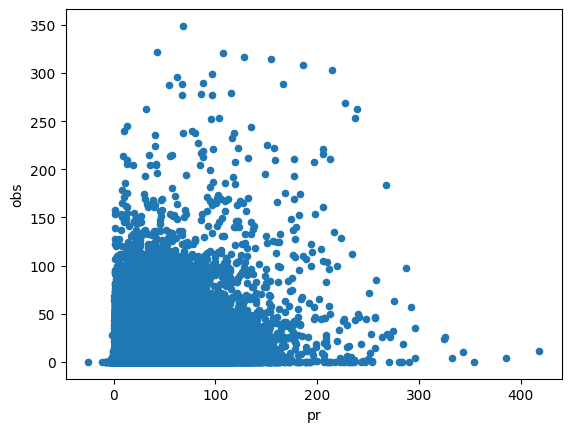

In [129]:
evdf.plot.scatter(x='pr' ,
                y='obs' )

In [67]:
import evaluation_tools as ev

In [ ]:
ev.evaluation_criteria( obs_test  ,  test_pr.T[0] *5   , th=1,
    threshold_heavy=25,
    threshold_ex=60,
    interval=[ i  for i in [ 0 , 5 , 10 , 25 , 60  , 100]] )

In [ ]:
# ANT colony 
x_train_ant = train_predict
obs_train_ant = columnar(obs_train)
obs_test_ant = columnar(obs_test)
ep = 1E-10

def sgn(x , th):
    return ((x - th + ep ) / np.absolute(x - th  +ep)  + 1)/2 

def CSI(  O , M ,th ):
    fo = sgn(O , th)
    fm = sgn(M ,th)
    return np.sum(fo * fm )  /  (np.sum(fo +fm) - np.sum(fo*fm))

mlp_model = MLP(nn_shape= [8 ,4, 1 ] , inp_feat=  x_train_ant.shape[1])

def fitness_function( solution  ):
    # solution =  solution/sqrt(number_of_parameters)
    mlp_model.update( solution)
    y  =  mlp_model.feed_forward(x_train_ant)
    return np.mean((y-obs_train_ant)**2)**0.5 /8  -  CSI(obs_train_ant , y  , 1 )   -  CSI(obs_train_ant , y  , 25 )   -  CSI(obs_train_ant , y  , 60 )
import numpy
n_var = mlp_model.Sum_params

problem_dict = {
    "bounds": FloatVar(  lb=(-1.,) * n_var, ub=(1.,) * n_var, name="delta"),
    "obj_func": fitness_function,
    "minmax": "min",}

model_ant = ACOR.OriginalACOR(epoch=20, pop_size=20, sample_count = 25, intent_factor = 0.5, zeta = 1.0)

g_best = model_ant.solve(problem_dict)
x_test_ant =  test_pr
mlp_model.update( g_best.solution)
y_ant = mlp_model.feed_forward(x_test_ant)[:, 0]
ev.evaluation_criteria(obs_test  , test_pr.T[0])

In [ ]:



def conv2d(input, kernel, stride=1, padding=0):
    batch_size, H, W, C = input.shape
    K, kH, kW, _ = kernel.shape
    out_H = (H - kH + 2 * padding) // stride + 1
    out_W = (W - kW + 2 * padding) // stride + 1
    output = np.zeros((batch_size, out_H, out_W, K))
    input_padded = np.pad(input, ((0, 0), (padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0)
    
    for b in range(batch_size):
        for k in range(K):
            for h in range(out_H):
                for w in range(out_W):
                    h_start = h * stride
                    w_start = w * stride
                    h_end = h_start + kH
                    w_end = w_start + kW
                    output[b, h, w, k] = np.sum(input_padded[b, h_start:h_end, w_start:w_end, :] * kernel[k, :, :, :])
    return output

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def squared_error_loss(output, target):
    return 0.5 * np.sum((output - target) ** 2)

def squared_error_loss_derivative(output, target):
    return output - target

def conv2d_backward(input, kernel, output_grad, stride=1, padding=0):
    batch_size, H, W, C = input.shape
    K, kH, kW, _ = kernel.shape
    out_H, out_W = output_grad.shape[1:3]
    input_grad = np.zeros_like(input)
    kernel_grad = np.zeros_like(kernel)
    input_padded = np.pad(input, ((0, 0), (padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0)
    input_grad_padded = np.pad(input_grad, ((0, 0), (padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0)
    
    for b in range(batch_size):
        for k in range(K):
            for h in range(out_H):
                for w in range(out_W):
                    h_start = h * stride
                    w_start = w * stride
                    h_end = h_start + kH
                    w_end = w_start + kW
                    input_grad_padded[b, h_start:h_end, w_start:w_end, :] += output_grad[b, h, w, k] * kernel[k, :, :, :]
                    kernel_grad[k, :, :, :] += output_grad[b, h, w, k] * input_padded[b, h_start:h_end, w_start:w_end, :]
    
    if padding > 0:
        input_grad = input_grad_padded[:, padding:-padding, padding:-padding, :]
    else:
        input_grad = input_grad_padded
    
    return input_grad, kernel_grad

def flatten(input):
    batch_size = input.shape[0]
    return input.reshape(batch_size, -1)

def dense(input, weights, biases):
    return np.dot(input, weights) + biases

def dense_backward(input, weights, output_grad):
    input_grad = np.dot(output_grad, weights.T)
    weights_grad = np.dot(input.T, output_grad)
    biases_grad = np.sum(output_grad, axis=0)
    return input_grad, weights_grad, biases_grad

def train(X, y, kernel, dense_weights, dense_biases, batch_sample ,  learning_rate=0.01, epochs=10, stride=1, padding=1):
    for epoch in range(epochs):
        # Forward pass
            
        b_size = batch_sample

        splits = np.arange(0 , n_samples  +b_size,   b_size )
        splits[-1] = len(X)
        learning_rate = learning_rate / (epoch+1)
        for i in tqdm(range( len(splits)-1), desc=f"epoch {epoch+1} : " , ncols= 100  ,colour='blue'):#  range(len(splits)-1):
            input_volume =  X[splits[i]:splits[i+1] ]
            target = np.array([y]).T[splits[i]:splits[i+1] ]  
            conv_output = conv2d(input_volume, kernel, stride=stride, padding=padding)
            activated_output = relu(conv_output)
            flattened_output = flatten(activated_output)
            dense_output = dense(flattened_output, dense_weights, dense_biases)
            loss = squared_error_loss(dense_output, target)
            
            # Backward pass
            loss_grad = squared_error_loss_derivative(dense_output, target)
            dense_input_grad, dense_weights_grad, dense_biases_grad = dense_backward(flattened_output, dense_weights, loss_grad)
            relu_grad = relu_derivative(activated_output) * dense_input_grad.reshape(activated_output.shape)
            input_grad, kernel_grad = conv2d_backward(input_volume, kernel, relu_grad, stride=stride, padding=padding)
            
            # Update weights with gradient clipping
            max_grad_norm = 1.0
            kernel_grad = np.clip(kernel_grad, -max_grad_norm, max_grad_norm)
            dense_weights_grad = np.clip(dense_weights_grad, -max_grad_norm, max_grad_norm)
            dense_biases_grad = np.clip(dense_biases_grad, -max_grad_norm, max_grad_norm)
            
            kernel -= learning_rate * kernel_grad
            dense_weights -= learning_rate * dense_weights_grad
            dense_biases -= learning_rate * dense_biases_grad
        
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}, RMSE: {(loss/target.shape[0])**0.5}" )
    return  kernel, dense_weights, dense_biases

# Example usage

if __name__ == "__main__":
    n_samples = x_train.shape[0]
    h = 7
    w = 7
    s = 4
    l = 16
    output_size = 1  # Assuming a single output per sample
    #  np.random.rand(n_samples, h, w, s)  # Batch of 5 samples, each of shape (h, w, s)
    kernel_o = np.random.randn( l, 3, 3, s  ) ##np.random.randn(l, 3, 3, s)  # 2 output channels, kernel size 3x3, s input channels
     # np.random.rand(n_samples, output_size)  # Batch of 5 target samples, each of shape (output_size)
    dense_weights_o = np.random.rand(h * w * l, output_size)  # Fully connected layer weights
    dense_biases_o = np.random.rand(output_size)  # Fully connected layer biases
    learning_rate = 1
    epochs = 10



    kernel_o, dense_weights_o , dense_biases_o = train( X = np.round(x_train[0:n_samples],2), 
                                                        y = np.round(obs_train[0:n_samples],2) , 
                                                        kernel= kernel_o,
                                                        dense_weights= dense_weights_o , 
                                                        dense_biases = dense_biases_o, 
                                                        batch_sample= 1000 , 
                                                        learning_rate=learning_rate , 
                                                        epochs=epochs, 
                                                        stride=1, padding=1)



In [86]:
np.arange(0 , n_samples+1000 ,   1000 )

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000])

In [99]:
input_volume =np.round(  x_train[0:n_samples ] ,2 ) 
target = np.round( np.array([obs_train]).T[0:n_samples]   , 2 )

conv_output = conv2d(input_volume, kernel_o, stride=1, padding=1)
activated_output = relu(conv_output)
flattened_output = flatten(activated_output)
dense_output = dense(flattened_output, dense_weights_o, dense_biases_o)

np.corrcoef(  dense_output.T[0]  , obs_train[0:n_samples ]  )

array([[1.        , 0.13122337],
       [0.13122337, 1.        ]])

In [ ]:
input_volume =np.round(  x_test[0:n_samples ] ,2 ) 
target = np.round( np.array([obs_test]).T[0:n_samples]   , 2 )

conv_output = conv2d(input_volume, kernel_o, stride=1, padding=1)
activated_output = relu(conv_output)
flattened_output = flatten(activated_output)
dense_output = dense(flattened_output, dense_weights_o, dense_biases_o)

np.corrcoef(  dense_output.T[0]  , obs_train[0:n_samples ]  )


To optimise your code for handling 1 million samples, we need to make several improvements, primarily focusing on leveraging vectorised operations provided by NumPy and avoiding nested loops wherever possible. Below are the optimised functions and the main training loop.

Optimised Code

In [77]:

import numpy as np

def conv2d(input, kernel, stride=1, padding=0):
    batch_size, H, W, C = input.shape
    K, kH, kW, _ = kernel.shape
    out_H = (H - kH + 2 * padding) // stride + 1
    out_W = (W - kW + 2 * padding) // stride + 1
    output = np.zeros((batch_size, out_H, out_W, K))
    input_padded = np.pad(input, ((0, 0), (padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0)
    
    for k in range(K):
        for h in range(out_H):
            for w in range(out_W):
                h_start = h * stride
                w_start = w * stride
                h_end = h_start + kH
                w_end = w_start + kW
                output[:, h, w, k] = np.sum(input_padded[:, h_start:h_end, w_start:w_end, :] * kernel[k, :, :, :], axis=(1, 2, 3))
    return output

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def squared_error_loss(output, target):
    return 0.5 * np.sum((output - target) ** 2)

def squared_error_loss_derivative(output, target):
    return output - target

def conv2d_backward(input, kernel, output_grad, stride=1, padding=0):
    batch_size, H, W, C = input.shape
    K, kH, kW, _ = kernel.shape
    out_H, out_W = output_grad.shape[1:3]
    input_grad = np.zeros_like(input)
    kernel_grad = np.zeros_like(kernel)
    input_padded = np.pad(input, ((0, 0), (padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0)
    input_grad_padded = np.pad(input_grad, ((0, 0), (padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0)
    
    for k in range(K):
        for h in range(out_H):
            for w in range(out_W):
                h_start = h * stride
                w_start = w * stride
                h_end = h_start + kH
                w_end = w_start + kW
                input_grad_padded[:, h_start:h_end, w_start:w_end, :] += output_grad[:, h, w, k][:, np.newaxis, np.newaxis, np.newaxis] * kernel[k, :, :, :]
                kernel_grad[k, :, :, :] += np.sum(output_grad[:, h, w, k][:, np.newaxis, np.newaxis, np.newaxis] * input_padded[:, h_start:h_end, w_start:w_end, :], axis=0)
    
    if padding > 0:
        input_grad = input_grad_padded[:, padding:-padding, padding:-padding, :]
    else:
        input_grad = input_grad_padded
    
    return input_grad, kernel_grad

def flatten(input):
    batch_size = input.shape[0]
    return input.reshape(batch_size, -1)

def dense(input, weights, biases):
    return np.dot(input, weights) + biases

def dense_backward(input, weights, output_grad):
    input_grad = np.dot(output_grad, weights.T)
    weights_grad = np.dot(input.T, output_grad)
    biases_grad = np.sum(output_grad, axis=0)
    return input_grad, weights_grad, biases_grad

def train(input_volume, target, kernel, dense_weights, dense_biases, learning_rate=0.01, epochs=10, stride=1, padding=1):
    for epoch in range(epochs):
        
        # Forward pass
        conv_output = conv2d(input_volume, kernel, stride=stride, padding=padding)
        activated_output = relu(conv_output)
        flattened_output = flatten(activated_output)
        dense_output = dense(flattened_output, dense_weights, dense_biases)
        loss = squared_error_loss(dense_output, target)
        
        # Backward pass
        loss_grad = squared_error_loss_derivative(dense_output, target)
        dense_input_grad, dense_weights_grad, dense_biases_grad = dense_backward(flattened_output, dense_weights, loss_grad)
        relu_grad = relu_derivative(activated_output) * dense_input_grad.reshape(activated_output.shape)
        input_grad, kernel_grad = conv2d_backward(input_volume, kernel, relu_grad, stride=stride, padding=padding)
        
        # Update weights with gradient clipping
        max_grad_norm = 1.0
        kernel_grad = np.clip(kernel_grad, -max_grad_norm, max_grad_norm)
        dense_weights_grad = np.clip(dense_weights_grad, -max_grad_norm, max_grad_norm)
        dense_biases_grad = np.clip(dense_biases_grad, -max_grad_norm, max_grad_norm)
        
        kernel -= learning_rate * kernel_grad
        dense_weights -= learning_rate * dense_weights_grad
        dense_biases -= learning_rate * dense_biases_grad
        
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}, RMSE: {(loss/target.shape[0])**0.5}" )
    return kernel, dense_weights, dense_biases

# Example usage

if __name__ == "__main__":
    n_samples = int(0.5E6)
    h = 7
    w = 7
    s = 4
    l = 16
    output_size = 1  # Assuming a single output per sample
    input_volume =  x_train[0:n_samples ]  #  np.random.rand(n_samples, h, w, s)  # Batch of 5 samples, each of shape (h, w, s)
    kernel = np.random.randn( l, 3, 3, s  ) ##np.random.randn(l, 3, 3, s)  # 2 output channels, kernel size 3x3, s input channels
    target =  np.array([obs_train]).T[0:n_samples ]  # np.random.rand(n_samples, output_size)  # Batch of 5 target samples, each of shape (output_size)
    dense_weights = np.random.rand(h * w * l, output_size)  # Fully connected layer weights
    dense_biases = np.random.rand(output_size)  # Fully connected layer biases
    learning_rate = 1
    epochs = 10
    kernel_o, dense_weights_o , dense_biases_o = train(input_volume, target, kernel, dense_weights, dense_biases, learning_rate=learning_rate , epochs=epochs, stride=1, padding=1)



KeyboardInterrupt



# Graphical Neural Networks

In [24]:
x_train = X_train[0]
x_test = X_test[0] 
    

In [11]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())


In [25]:

import os
import torch
os.environ['TORCH'] = torch.__version__
os.environ['PYTHONWARNINGS'] = "ignore"
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv( x_train.shape[1], hidden_channels)
        self.conv2 = GCNConv( 16 ,1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)


GCN(
  (conv1): GCNConv(6, 16)
  (conv2): GCNConv(16, 1)
)


In [56]:
edge_index =  np.zeros(   (2,  x_train.shape[0])  )+1

In [8]:
edge_index_train = []
for i in range( x_train.shape[0] ) :
    edge_index_train.append( [ i , i+1]  )
edge_index_train = np.array(edge_index_train).T

In [32]:
edge_index_test = []
for i in range( x_train.shape[0] ) :
    edge_index_test.append( [ i , i]  )
edge_index_test = np.array(edge_index_test).T

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# Define the Graph Neural Network model
class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.fc1 = GCNConv(input_dim, hidden_dim)
        self.fc2 = GCNConv(hidden_dim, output_dim)
    def forward(self, x, edge_index):
        x = self.fc1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.fc2(x, edge_index)
        return x

# Assuming you have your data loaded into X_train and y_train
n1 = int(x_train.shape[0]/2)
n2 = int(x_test.shape[0]/2)

x_train_tensor =  torch.from_numpy(x_train ).type(torch.FloatTensor)[ 0:n1  , :]
x_test_tensor =  torch.from_numpy(x_test).type(torch.FloatTensor)[ 0:n2  , :]
y_train = torch.from_numpy(obs_train).type(torch.FloatTensor)[ 0:n1  ]
y_test = torch.from_numpy(obs_test).type(torch.FloatTensor)[ 0:n2  ]


edge_index_train_tensor = torch.from_numpy(edge_index_train.astype(int) ).type(torch.IntTensor)[ :  , 0:n1  ]
edge_index_test_tensor = torch.from_numpy(edge_index_test.astype(int) ).type(torch.IntTensor)[ :  , 0:n2 ]
edge_index_train_tensor[-1,-1] = 0
edge_index_test_tensor[-1,-1]  = 0

# Initialize the GNN model
model = GNN( input_dim=x_train.shape[1],  hidden_dim=8, output_dim=1)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    output = model.forward(x_train_tensor , edge_index_train_tensor )
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    print(loss)


In [21]:
import evaluation_tools

In [17]:
edge_index_train_tensor

tensor([[   0,    1,    2,  ..., 9997, 9998, 9999],
        [   1,    2,    3,  ..., 9998, 9999,    0]], dtype=torch.int32)

In [30]:

# Once trained, you can use the model to make predictions
predictions = model.forward(x_test_tensor, edge_index_test_tensor)
pr = [ ]
for p in predictions:
    pr.append( float(p))
pr = np.array(pr)

In [ ]:
evaluation_tools.evaluation_criteria( y_test.numpy() ,   pr )

# Evaluation 

In [ ]:

import evaluation_tools

ms = ['CNN_RA_(7,7)', 'CNN_RA_C_(7,7)' , 'CNN_RA_C_[-1](7,7)', 'CNN_RA_C_[-2](7,7)', 'CNN_RA_C_[-3](7,7)' , 'CNN_RA_(5,5)', 'CNN_RA_C_(5,5)' , 'CNN_RA_(3,3)', 'CNN_RA_C_(3,3)'   ,  'LSTM_RA_3(-4)', 'CAL_P'   ,'PDIR' , 'ERA5_tp']

t = 'test'
ev_df = pd.DataFrame()

for k in ms :
    for hdf in hdfs :
        if k in list(hdf.keys()):
            DF[k] = np.array(hdf[k])

test = DF[DF['YEAR'] > 2020]
for k in list(test.keys()):
    df['test'][k]   = np.array(test[k])

df['test']['ERA5_tp']  = df['test']['ERA5_tp'] *24*1000

out = []
for m in ms :
    ev = evaluation_tools.evaluation_criteria(  np.array(df[t][obs_key])  , np.array( df[t][m])  , th =1  ) 
    out.append(ev) 

out = pd.DataFrame(out , index = ms)
out.T



# Save Dataset

In [53]:

# save outputs
import xarray
try: del df['train']['dim_0'] 
except: pass 

try: del df['test']['dim_0'] 
except: pass 

of_train =  r"..\dataset\train_02.nc4"
of_test = r"..\dataset\test_02.nc4"

xr = xarray.Dataset(  df['train']  ) 
xr.to_netcdf( of_train , format="NETCDF4")

xr = xarray.Dataset(  df['test']  ) 
xr.to_netcdf( of_test , format="NETCDF4")


In [31]:
# save parent Data Frame
for K in ord_Keys :
    for k in K:
        try: del DF[k]  
        except: pass


In [22]:
Dict_to_hdf( DF  ,   r"D:\Projects\precipitation_AUS\dataset\0025_WA/DF1.hdf5" )

In [54]:
DF = pd.concat([df['train']  , df['test']])
DF['Date']  = DF['YEAR'].astype(str) + '-' +DF['MONTH'].astype(str) +'-' + DF['DAY'].astype(str)
xr = xarray.Dataset(  DF ) 

xr.to_netcdf( r"..\dataset\dataset_2014-2024_0024.nc4" , format="NETCDF4")
